In [1]:
import torch, torch.nn as nn, torch.nn.functional as F
from torch.autograd import Variable
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.utils.data as data_utils
import tensorboardX

train = pd.read_csv('creditcard_train.csv')

feats = [f for f in train.columns if f not in ['Class','class','Unnamed: 0','class_pred','Index']]
X = train[feats].values
y = train['Class'].values

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

class FraudNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(30, 16)
        self.fc2 = nn.Linear(16, 18)
        self.fc3 = nn.Linear(18, 20)
        self.fc4 = nn.Linear(20, 24)
        self.fc5 = nn.Linear(24, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.25)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.sigmoid(self.fc5(x))
        return x

In [2]:
net = FraudNet().double()

In [3]:
X_train = torch.from_numpy(X)
Y_train = torch.from_numpy(y).double()

In [4]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [5]:
training_epochs = 2
minibatch_size = 64

In [6]:
train = data_utils.TensorDataset(X_train, Y_train)
train_loader = data_utils.DataLoader(train, batch_size=minibatch_size, shuffle=True)

In [19]:
len(X_test)

51266

In [20]:
len(Y_test)

51266

In [7]:
X_test = torch.from_numpy(X_test)
Y_test = torch.from_numpy(Y_test).double()
test = data_utils.TensorDataset(X_test, Y_test)
test_loader = data_utils.DataLoader(test, batch_size=minibatch_size, shuffle=True)

In [33]:
import time
start = time.time()
for i in range(training_epochs):
    for b, data in enumerate(train_loader, 0):
        inputs, labels = data
        y_pred = net(inputs)
        loss = loss_fn(y_pred, labels)
        
        if b % 100:
            print('Epochs: {}, batch: {} loss: {}'.format(i, b, loss))
        #reset gradients
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # update weights
        optimizer.step()
end = time.time()

print(end-start)

/Users/wufei/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/wufei/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Epochs: 0, batch: 1 loss: 0.0006872918476159568
Epochs: 0, batch: 2 loss: 0.001467162705310464
Epochs: 0, batch: 3 loss: 0.00011130086759483967
Epochs: 0, batch: 4 loss: 0.00018149357052200536
Epochs: 0, batch: 5 loss: 0.00025130790928606494
Epochs: 0, batch: 6 loss: 0.0010097129872083806
Epochs: 0, batch: 7 loss: 0.0003082833770393271
Epochs: 0, batch: 8 loss: 0.002837939110799897
Epochs: 0, batch: 9 loss: 0.00042938003241693154
Epochs: 0, batch: 10 loss: 0.00030853674155533324
Epochs: 0, batch: 11 loss: 0.00042826075208782184
Epochs: 0, batch: 12 loss: 0.0003883799405886208
Epochs: 0, batch: 13 loss: 0.0027535574172824766
Epochs: 0, batch: 14 loss: 0.0007130700158554513
Epochs: 0, batch: 15 loss: 0.0001169438520186712
Epochs: 0, batch: 16 loss: 0.0003473105450842736
Epochs: 0, batch: 17 loss: 0.0012157604564698903
Epochs: 0, batch: 18 loss: 0.0001693555849492625
Epochs: 0, batch: 19 loss: 0.0006505363524067247
Epochs: 0, batch: 20 loss: 0.0011668050428388897
Epochs: 0, batch: 21 loss

Epochs: 0, batch: 219 loss: 0.011880406296456007
Epochs: 0, batch: 220 loss: 0.00949477552299256
Epochs: 0, batch: 221 loss: 0.00018669499558816012
Epochs: 0, batch: 222 loss: 4.864970835943261e-05
Epochs: 0, batch: 223 loss: 0.00148404251115964
Epochs: 0, batch: 224 loss: 0.0009548722948299106
Epochs: 0, batch: 225 loss: 4.488501255646262e-05
Epochs: 0, batch: 226 loss: 2.83932795263624e-05
Epochs: 0, batch: 227 loss: 0.003011593798912086
Epochs: 0, batch: 228 loss: 2.416464629495586e-05
Epochs: 0, batch: 229 loss: 8.003488589715526e-05
Epochs: 0, batch: 230 loss: 7.591505774902944e-05
Epochs: 0, batch: 231 loss: 4.892771908786707e-05
Epochs: 0, batch: 232 loss: 0.00042740368532036944
Epochs: 0, batch: 233 loss: 0.00013010047957224733
Epochs: 0, batch: 234 loss: 0.00013686396501367708
Epochs: 0, batch: 235 loss: 4.150349454544619e-05
Epochs: 0, batch: 236 loss: 0.038622263111353784
Epochs: 0, batch: 237 loss: 7.081356475533846e-05
Epochs: 0, batch: 238 loss: 3.14785297007055e-05
Epoch

Epochs: 0, batch: 484 loss: 1.9530050106936217e-05
Epochs: 0, batch: 485 loss: 0.0029349265007969656
Epochs: 0, batch: 486 loss: 0.00022045200417540164
Epochs: 0, batch: 487 loss: 6.162541441039698e-05
Epochs: 0, batch: 488 loss: 1.2217222887724038e-05
Epochs: 0, batch: 489 loss: 3.554848825720567e-05
Epochs: 0, batch: 490 loss: 0.00019613567351411157
Epochs: 0, batch: 491 loss: 0.002343187611555946
Epochs: 0, batch: 492 loss: 2.7117467226435e-05
Epochs: 0, batch: 493 loss: 0.00011286017374297742
Epochs: 0, batch: 494 loss: 3.556903183769826e-05
Epochs: 0, batch: 495 loss: 6.650200467750733e-05
Epochs: 0, batch: 496 loss: 2.7865548054524155e-05
Epochs: 0, batch: 497 loss: 1.7545568133958894e-05
Epochs: 0, batch: 498 loss: 8.05790329513347e-05
Epochs: 0, batch: 499 loss: 2.1469459197901347e-05
Epochs: 0, batch: 501 loss: 0.00017395829297292366
Epochs: 0, batch: 502 loss: 2.371380217761943e-05
Epochs: 0, batch: 503 loss: 2.796564353540501e-05
Epochs: 0, batch: 504 loss: 2.723471433253721

Epochs: 0, batch: 738 loss: 0.021340931587692753
Epochs: 0, batch: 739 loss: 0.0001388902735542439
Epochs: 0, batch: 740 loss: 8.278618417784247e-05
Epochs: 0, batch: 741 loss: 0.00017805159864197004
Epochs: 0, batch: 742 loss: 3.016513006265996e-05
Epochs: 0, batch: 743 loss: 0.0024849300909722347
Epochs: 0, batch: 744 loss: 0.00026380118681550933
Epochs: 0, batch: 745 loss: 0.00019237732956254
Epochs: 0, batch: 746 loss: 0.0009533525984637644
Epochs: 0, batch: 747 loss: 0.0001762634080943033
Epochs: 0, batch: 748 loss: 0.00011074120247654306
Epochs: 0, batch: 749 loss: 7.44799423835907e-05
Epochs: 0, batch: 750 loss: 7.763695726833508e-05
Epochs: 0, batch: 751 loss: 3.519428680703104e-05
Epochs: 0, batch: 752 loss: 0.0007852117429747646
Epochs: 0, batch: 753 loss: 0.00010868448980412837
Epochs: 0, batch: 754 loss: 8.267789510153262e-05
Epochs: 0, batch: 755 loss: 6.859872618468656e-05
Epochs: 0, batch: 756 loss: 5.891032945085834e-05
Epochs: 0, batch: 757 loss: 7.458468735972544e-05


Epochs: 0, batch: 1002 loss: 0.00028269348684975906
Epochs: 0, batch: 1003 loss: 0.00017497780269474215
Epochs: 0, batch: 1004 loss: 0.00018089840620528382
Epochs: 0, batch: 1005 loss: 0.0002101966858165597
Epochs: 0, batch: 1006 loss: 0.00020641845756105698
Epochs: 0, batch: 1007 loss: 0.0003440810605751085
Epochs: 0, batch: 1008 loss: 0.025466865292016652
Epochs: 0, batch: 1009 loss: 0.00047764776545781084
Epochs: 0, batch: 1010 loss: 0.00021553459380895584
Epochs: 0, batch: 1011 loss: 0.00021139126103513446
Epochs: 0, batch: 1012 loss: 0.00032583169576541306
Epochs: 0, batch: 1013 loss: 0.0002166765240415376
Epochs: 0, batch: 1014 loss: 0.00011843289051316833
Epochs: 0, batch: 1015 loss: 0.00012788678154697524
Epochs: 0, batch: 1016 loss: 0.0015980777292869286
Epochs: 0, batch: 1017 loss: 0.00016270678182359947
Epochs: 0, batch: 1018 loss: 0.0004432508863188468
Epochs: 0, batch: 1019 loss: 0.00015368903969958152
Epochs: 0, batch: 1020 loss: 0.00023760352649623145
Epochs: 0, batch: 1

Epochs: 0, batch: 1261 loss: 0.0016117074871563198
Epochs: 0, batch: 1262 loss: 0.0002458368625861689
Epochs: 0, batch: 1263 loss: 0.00032361972366825177
Epochs: 0, batch: 1264 loss: 0.00044412495783814355
Epochs: 0, batch: 1265 loss: 0.00022275071049088376
Epochs: 0, batch: 1266 loss: 0.00013477445404167076
Epochs: 0, batch: 1267 loss: 0.0005957698704280684
Epochs: 0, batch: 1268 loss: 0.0001855758805768042
Epochs: 0, batch: 1269 loss: 0.00038497769755392326
Epochs: 0, batch: 1270 loss: 0.0005471353562019889
Epochs: 0, batch: 1271 loss: 0.00028102730902889854
Epochs: 0, batch: 1272 loss: 0.00015200592752220927
Epochs: 0, batch: 1273 loss: 0.0002609747986377404
Epochs: 0, batch: 1274 loss: 0.00018745773512800814
Epochs: 0, batch: 1275 loss: 0.00024063467345426147
Epochs: 0, batch: 1276 loss: 0.0008676016316950934
Epochs: 0, batch: 1277 loss: 0.00018170769574299102
Epochs: 0, batch: 1278 loss: 0.0003230428652157735
Epochs: 0, batch: 1279 loss: 0.03937538845746416
Epochs: 0, batch: 1280 

Epochs: 0, batch: 1524 loss: 0.05108327328431237
Epochs: 0, batch: 1525 loss: 5.174069792145891e-05
Epochs: 0, batch: 1526 loss: 3.798823167095214e-05
Epochs: 0, batch: 1527 loss: 5.252135673168259e-05
Epochs: 0, batch: 1528 loss: 8.224807231776461e-05
Epochs: 0, batch: 1529 loss: 3.595256774562191e-05
Epochs: 0, batch: 1530 loss: 8.240239328271355e-05
Epochs: 0, batch: 1531 loss: 8.200098941825945e-05
Epochs: 0, batch: 1532 loss: 0.0002184124911900367
Epochs: 0, batch: 1533 loss: 3.1867480970576475e-05
Epochs: 0, batch: 1534 loss: 0.00011049443313223716
Epochs: 0, batch: 1535 loss: 0.00011484254191619766
Epochs: 0, batch: 1536 loss: 3.0245336050262747e-05
Epochs: 0, batch: 1537 loss: 4.1022907480776716e-05
Epochs: 0, batch: 1538 loss: 7.020215026291319e-05
Epochs: 0, batch: 1539 loss: 3.07042466166128e-05
Epochs: 0, batch: 1540 loss: 4.548570840959753e-05
Epochs: 0, batch: 1541 loss: 3.75222763036052e-05
Epochs: 0, batch: 1542 loss: 0.0027121921004656076
Epochs: 0, batch: 1543 loss: 5

Epochs: 0, batch: 1783 loss: 0.0031513491153603583
Epochs: 0, batch: 1784 loss: 1.6791415013642883e-05
Epochs: 0, batch: 1785 loss: 0.00029921738252496304
Epochs: 0, batch: 1786 loss: 0.0003985240826135691
Epochs: 0, batch: 1787 loss: 3.58817151484885e-05
Epochs: 0, batch: 1788 loss: 3.701609736487915e-05
Epochs: 0, batch: 1789 loss: 0.027211210146389265
Epochs: 0, batch: 1790 loss: 0.000139858640707681
Epochs: 0, batch: 1791 loss: 0.00012530732177143855
Epochs: 0, batch: 1792 loss: 4.29374118788633e-05
Epochs: 0, batch: 1793 loss: 0.00017547710873161795
Epochs: 0, batch: 1794 loss: 9.000743482791091e-05
Epochs: 0, batch: 1795 loss: 0.00022993857461939783
Epochs: 0, batch: 1796 loss: 0.00010042656537700477
Epochs: 0, batch: 1797 loss: 0.00015206828907368843
Epochs: 0, batch: 1798 loss: 8.446076271963863e-05
Epochs: 0, batch: 1799 loss: 5.8264128648016986e-05
Epochs: 0, batch: 1801 loss: 0.00018174549670068303
Epochs: 0, batch: 1802 loss: 3.613416315911526e-05
Epochs: 0, batch: 1803 los

Epochs: 0, batch: 2043 loss: 0.00012852316154428345
Epochs: 0, batch: 2044 loss: 9.365406018465851e-05
Epochs: 0, batch: 2045 loss: 0.00027418494629105866
Epochs: 0, batch: 2046 loss: 0.00010547055651154483
Epochs: 0, batch: 2047 loss: 0.0028026987643498
Epochs: 0, batch: 2048 loss: 5.696016680723172e-05
Epochs: 0, batch: 2049 loss: 9.239535449723324e-05
Epochs: 0, batch: 2050 loss: 9.557644947875646e-05
Epochs: 0, batch: 2051 loss: 5.954003690127159e-05
Epochs: 0, batch: 2052 loss: 7.02669572437167e-05
Epochs: 0, batch: 2053 loss: 0.0002508028115407766
Epochs: 0, batch: 2054 loss: 0.0004298399269308573
Epochs: 0, batch: 2055 loss: 0.00010471866138635014
Epochs: 0, batch: 2056 loss: 8.931554662147261e-05
Epochs: 0, batch: 2057 loss: 0.003411848100413749
Epochs: 0, batch: 2058 loss: 0.003901060591072617
Epochs: 0, batch: 2059 loss: 0.0001925452425431111
Epochs: 0, batch: 2060 loss: 0.00011678651242380195
Epochs: 0, batch: 2061 loss: 7.364834822039548e-05
Epochs: 0, batch: 2062 loss: 5.1

Epochs: 0, batch: 2316 loss: 6.909463354966771e-05
Epochs: 0, batch: 2317 loss: 0.00011294786116367658
Epochs: 0, batch: 2318 loss: 0.0002567277639787912
Epochs: 0, batch: 2319 loss: 0.00013843952411405082
Epochs: 0, batch: 2320 loss: 9.69757985950815e-05
Epochs: 0, batch: 2321 loss: 0.00019693274966907335
Epochs: 0, batch: 2322 loss: 0.0005182204956047187
Epochs: 0, batch: 2323 loss: 0.00030614678870088225
Epochs: 0, batch: 2324 loss: 0.0015843154269178012
Epochs: 0, batch: 2325 loss: 0.0001220862066530067
Epochs: 0, batch: 2326 loss: 0.00017065114231573801
Epochs: 0, batch: 2327 loss: 7.927277167385914e-05
Epochs: 0, batch: 2328 loss: 0.00016092405807481498
Epochs: 0, batch: 2329 loss: 0.026339846349286287
Epochs: 0, batch: 2330 loss: 9.568401879372085e-05
Epochs: 0, batch: 2331 loss: 0.03129112594901153
Epochs: 0, batch: 2332 loss: 0.0001880750213454125
Epochs: 0, batch: 2333 loss: 7.653235022603682e-05
Epochs: 0, batch: 2334 loss: 6.283955897199087e-05
Epochs: 0, batch: 2335 loss: 

Epochs: 0, batch: 2585 loss: 0.001196941875598353
Epochs: 0, batch: 2586 loss: 0.000192396818061666
Epochs: 0, batch: 2587 loss: 0.0037951883043492508
Epochs: 0, batch: 2588 loss: 0.0002662686775213634
Epochs: 0, batch: 2589 loss: 0.0008942813368771497
Epochs: 0, batch: 2590 loss: 0.00043802141506931564
Epochs: 0, batch: 2591 loss: 0.00019818770007846057
Epochs: 0, batch: 2592 loss: 0.00023475031042927274
Epochs: 0, batch: 2593 loss: 0.002202897591711619
Epochs: 0, batch: 2594 loss: 0.0002411528969277852
Epochs: 0, batch: 2595 loss: 0.00044409388759489424
Epochs: 0, batch: 2596 loss: 0.0007239612523183091
Epochs: 0, batch: 2597 loss: 0.0001415592377687535
Epochs: 0, batch: 2598 loss: 0.00021480716777234413
Epochs: 0, batch: 2599 loss: 0.00020516216915623416
Epochs: 0, batch: 2601 loss: 0.00042072055881946035
Epochs: 0, batch: 2602 loss: 0.0006177486270014544
Epochs: 0, batch: 2603 loss: 0.00020439658403425732
Epochs: 0, batch: 2604 loss: 0.000833290664730337
Epochs: 0, batch: 2605 loss

Epochs: 0, batch: 2843 loss: 0.00010503409233512693
Epochs: 0, batch: 2844 loss: 8.39784357361889e-05
Epochs: 0, batch: 2845 loss: 0.0001900444806606699
Epochs: 0, batch: 2846 loss: 0.00018585983894526487
Epochs: 0, batch: 2847 loss: 8.094892374711537e-05
Epochs: 0, batch: 2848 loss: 0.0001125807919101174
Epochs: 0, batch: 2849 loss: 0.00029479553994768247
Epochs: 0, batch: 2850 loss: 0.0005254605653141073
Epochs: 0, batch: 2851 loss: 0.00012059474233453793
Epochs: 0, batch: 2852 loss: 0.00015578831651117758
Epochs: 0, batch: 2853 loss: 0.00016683335608058377
Epochs: 0, batch: 2854 loss: 0.004071167583865332
Epochs: 0, batch: 2855 loss: 6.762143706058069e-05
Epochs: 0, batch: 2856 loss: 8.874426421133413e-05
Epochs: 0, batch: 2857 loss: 7.629866570094724e-05
Epochs: 0, batch: 2858 loss: 0.00184369348431462
Epochs: 0, batch: 2859 loss: 5.2434873084140046e-05
Epochs: 0, batch: 2860 loss: 4.979476395784654e-05
Epochs: 0, batch: 2861 loss: 0.00012187941627865012
Epochs: 0, batch: 2862 loss

Epochs: 0, batch: 3062 loss: 8.923353886434962e-05
Epochs: 0, batch: 3063 loss: 0.0036488916954097767
Epochs: 0, batch: 3064 loss: 4.791412090908222e-05
Epochs: 0, batch: 3065 loss: 9.543538210963392e-05
Epochs: 0, batch: 3066 loss: 7.283747866799755e-05
Epochs: 0, batch: 3067 loss: 5.8397198528801305e-05
Epochs: 0, batch: 3068 loss: 4.5661360304601986e-05
Epochs: 0, batch: 3069 loss: 0.0036897642011561173
Epochs: 0, batch: 3070 loss: 9.859142137028983e-05
Epochs: 0, batch: 3071 loss: 4.702626836497957e-05
Epochs: 0, batch: 3072 loss: 0.07403292543955742
Epochs: 0, batch: 3073 loss: 7.440838229572596e-05
Epochs: 0, batch: 3074 loss: 0.002870192785339471
Epochs: 0, batch: 3075 loss: 9.254662030290673e-05
Epochs: 0, batch: 3076 loss: 5.446145308873917e-05
Epochs: 0, batch: 3077 loss: 7.895242631209232e-05
Epochs: 0, batch: 3078 loss: 0.00039588857848781684
Epochs: 0, batch: 3079 loss: 0.02933225407877705
Epochs: 0, batch: 3080 loss: 0.00014325587043127373
Epochs: 0, batch: 3081 loss: 0.0

Epochs: 0, batch: 3291 loss: 5.686507567550517e-05
Epochs: 0, batch: 3292 loss: 0.0016548336949472199
Epochs: 0, batch: 3293 loss: 0.0001912826677925127
Epochs: 0, batch: 3294 loss: 0.09861777465678073
Epochs: 0, batch: 3295 loss: 0.0014997349554598648
Epochs: 0, batch: 3296 loss: 0.00011686982313695787
Epochs: 0, batch: 3297 loss: 0.00044689569265203886
Epochs: 0, batch: 3298 loss: 0.0006028049920465083
Epochs: 0, batch: 3299 loss: 5.565120194761892e-05
Epochs: 0, batch: 3301 loss: 0.000100748933323674
Epochs: 0, batch: 3302 loss: 0.00020120423497698144
Epochs: 0, batch: 3303 loss: 0.0001014745770841696
Epochs: 0, batch: 3304 loss: 0.00011900928504596255
Epochs: 0, batch: 3305 loss: 0.00028829355480998437
Epochs: 0, batch: 3306 loss: 0.00023819627093829744
Epochs: 0, batch: 3307 loss: 0.00021253060771194752
Epochs: 0, batch: 3308 loss: 0.002155346652683778
Epochs: 0, batch: 3309 loss: 0.00022280199036747326
Epochs: 0, batch: 3310 loss: 0.0001774013738873864
Epochs: 0, batch: 3311 loss

Epochs: 0, batch: 3523 loss: 0.0003987222770141924
Epochs: 0, batch: 3524 loss: 0.0017513607233476272
Epochs: 0, batch: 3525 loss: 0.00017392025959626128
Epochs: 0, batch: 3526 loss: 0.00037044511686403533
Epochs: 0, batch: 3527 loss: 0.0003108288016616287
Epochs: 0, batch: 3528 loss: 0.00029254037762005365
Epochs: 0, batch: 3529 loss: 0.00041549272169724244
Epochs: 0, batch: 3530 loss: 0.0015048453035623355
Epochs: 0, batch: 3531 loss: 0.0001607062682368631
Epochs: 0, batch: 3532 loss: 0.0002896302875019348
Epochs: 0, batch: 3533 loss: 0.00031128682872249083
Epochs: 0, batch: 3534 loss: 0.00020060342669021906
Epochs: 0, batch: 3535 loss: 0.00045915073055227115
Epochs: 0, batch: 3536 loss: 0.0003262760878227302
Epochs: 0, batch: 3537 loss: 0.00019909071459396123
Epochs: 0, batch: 3538 loss: 0.00011491707919895074
Epochs: 0, batch: 3539 loss: 0.0001778502719344356
Epochs: 0, batch: 3540 loss: 0.00020472777205088872
Epochs: 0, batch: 3541 loss: 0.00018252128824049698
Epochs: 0, batch: 35

Epochs: 0, batch: 3790 loss: 5.6374733702907694e-05
Epochs: 0, batch: 3791 loss: 0.00010947448323462544
Epochs: 0, batch: 3792 loss: 0.0025588406538495593
Epochs: 0, batch: 3793 loss: 4.640370580244035e-05
Epochs: 0, batch: 3794 loss: 6.534540709976791e-05
Epochs: 0, batch: 3795 loss: 0.0001585993383422141
Epochs: 0, batch: 3796 loss: 0.00010834733303233813
Epochs: 0, batch: 3797 loss: 4.8959762914289025e-05
Epochs: 0, batch: 3798 loss: 4.5280440733518346e-05
Epochs: 0, batch: 3799 loss: 6.649445557342103e-05
Epochs: 0, batch: 3801 loss: 3.383921443109595e-05
Epochs: 0, batch: 3802 loss: 0.002813961765450888
Epochs: 0, batch: 3803 loss: 0.00021324569747544536
Epochs: 0, batch: 3804 loss: 0.1229819762138449
Epochs: 0, batch: 3805 loss: 9.122020247922615e-05
Epochs: 0, batch: 3806 loss: 0.0001239378399938694
Epochs: 0, batch: 3807 loss: 7.757675233860139e-05
Epochs: 0, batch: 3808 loss: 0.00011201284940983008
Epochs: 0, batch: 3809 loss: 4.753401081500977e-05
Epochs: 0, batch: 3810 loss:

/Users/wufei/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


Epochs: 1, batch: 40 loss: 3.210006094639249e-06
Epochs: 1, batch: 41 loss: 1.606008265360095e-05
Epochs: 1, batch: 42 loss: 3.086199953898848e-07
Epochs: 1, batch: 43 loss: 4.5507311163723937e-07
Epochs: 1, batch: 44 loss: 1.4532248567699592e-06
Epochs: 1, batch: 45 loss: 1.6437140113855825e-06
Epochs: 1, batch: 46 loss: 6.356575301773902e-06
Epochs: 1, batch: 47 loss: 1.6989484319317635e-05
Epochs: 1, batch: 48 loss: 7.6032841529755395e-06
Epochs: 1, batch: 49 loss: 1.0817003877210901e-06
Epochs: 1, batch: 50 loss: 0.035483004921958695
Epochs: 1, batch: 51 loss: 1.116472357102639e-06
Epochs: 1, batch: 52 loss: 0.004288484279307771
Epochs: 1, batch: 53 loss: 4.766897695369502e-07
Epochs: 1, batch: 54 loss: 0.0006541652696051896
Epochs: 1, batch: 55 loss: 4.167699025207891e-06
Epochs: 1, batch: 56 loss: 0.0006119851016964645
Epochs: 1, batch: 57 loss: 5.293414128255638e-06
Epochs: 1, batch: 58 loss: 4.408682713994669e-05
Epochs: 1, batch: 59 loss: 1.1343851895300944e-06
Epochs: 1, batc

Epochs: 1, batch: 296 loss: 0.0012472899740708708
Epochs: 1, batch: 297 loss: 0.0002882200172182165
Epochs: 1, batch: 298 loss: 0.0009421811260994476
Epochs: 1, batch: 299 loss: 0.0013308849471075094
Epochs: 1, batch: 301 loss: 0.0005654646781973929
Epochs: 1, batch: 302 loss: 0.024699354407752894
Epochs: 1, batch: 303 loss: 0.000883414555228744
Epochs: 1, batch: 304 loss: 0.000195196223818795
Epochs: 1, batch: 305 loss: 0.0008407272338232634
Epochs: 1, batch: 306 loss: 0.00023428521372217682
Epochs: 1, batch: 307 loss: 0.00025249901213354286
Epochs: 1, batch: 308 loss: 0.0022413887946102994
Epochs: 1, batch: 309 loss: 0.000358921753252082
Epochs: 1, batch: 310 loss: 0.00031770101100510475
Epochs: 1, batch: 311 loss: 0.00032720724501871196
Epochs: 1, batch: 312 loss: 0.0009314432511839584
Epochs: 1, batch: 313 loss: 0.0038606342426160526
Epochs: 1, batch: 314 loss: 0.0004842179650045586
Epochs: 1, batch: 315 loss: 0.0004254518703738152
Epochs: 1, batch: 316 loss: 0.0008525702392851188


Epochs: 1, batch: 567 loss: 1.9518723286675153e-05
Epochs: 1, batch: 568 loss: 8.505116110391132e-05
Epochs: 1, batch: 569 loss: 1.0205027611526678e-05
Epochs: 1, batch: 570 loss: 4.5027590413502145e-06
Epochs: 1, batch: 571 loss: 2.7682395004385056e-05
Epochs: 1, batch: 572 loss: 0.0016060699933499163
Epochs: 1, batch: 573 loss: 2.2121470345941913e-05
Epochs: 1, batch: 574 loss: 3.105973056250293e-05
Epochs: 1, batch: 575 loss: 0.00019199405419904572
Epochs: 1, batch: 576 loss: 6.492863613616483e-05
Epochs: 1, batch: 577 loss: 0.002352373757890289
Epochs: 1, batch: 578 loss: 1.1104571589416963e-05
Epochs: 1, batch: 579 loss: 3.187112858185707e-05
Epochs: 1, batch: 580 loss: 6.344950137144839e-06
Epochs: 1, batch: 581 loss: 2.979506079422249e-05
Epochs: 1, batch: 582 loss: 1.4708432444427885e-05
Epochs: 1, batch: 583 loss: 0.023969977327383228
Epochs: 1, batch: 584 loss: 0.0003284059824959595
Epochs: 1, batch: 585 loss: 2.093455658525083e-05
Epochs: 1, batch: 586 loss: 0.00295703759123

Epochs: 1, batch: 835 loss: 0.00018828304196714463
Epochs: 1, batch: 836 loss: 0.11010839563371196
Epochs: 1, batch: 837 loss: 0.0012121915640950207
Epochs: 1, batch: 838 loss: 0.00020493174046578628
Epochs: 1, batch: 839 loss: 0.0003354632070284327
Epochs: 1, batch: 840 loss: 0.00021025967771321082
Epochs: 1, batch: 841 loss: 0.0007361677127844061
Epochs: 1, batch: 842 loss: 0.0002836045453759716
Epochs: 1, batch: 843 loss: 0.00028093574674571193
Epochs: 1, batch: 844 loss: 0.10593265143467545
Epochs: 1, batch: 845 loss: 0.0006254106190764205
Epochs: 1, batch: 846 loss: 0.00037587357492165513
Epochs: 1, batch: 847 loss: 0.00040747217649687666
Epochs: 1, batch: 848 loss: 0.00052558512533196
Epochs: 1, batch: 849 loss: 0.0004280641456332388
Epochs: 1, batch: 850 loss: 0.001688480203206689
Epochs: 1, batch: 851 loss: 0.0005705397911313251
Epochs: 1, batch: 852 loss: 0.0003834785638298324
Epochs: 1, batch: 853 loss: 0.0019283948325336216
Epochs: 1, batch: 854 loss: 0.0011688518226790805
E

Epochs: 1, batch: 1102 loss: 0.0002083480675504485
Epochs: 1, batch: 1103 loss: 0.000160400176680089
Epochs: 1, batch: 1104 loss: 0.00018631555842627272
Epochs: 1, batch: 1105 loss: 3.5270660825148447e-05
Epochs: 1, batch: 1106 loss: 5.791097328519103e-05
Epochs: 1, batch: 1107 loss: 0.10943860033390893
Epochs: 1, batch: 1108 loss: 5.410643204669825e-05
Epochs: 1, batch: 1109 loss: 5.790121477137519e-05
Epochs: 1, batch: 1110 loss: 0.0006491678582409937
Epochs: 1, batch: 1111 loss: 0.002827226511429218
Epochs: 1, batch: 1112 loss: 5.177754088911231e-05
Epochs: 1, batch: 1113 loss: 0.00017164440016196136
Epochs: 1, batch: 1114 loss: 0.00025236126466378643
Epochs: 1, batch: 1115 loss: 0.00024295379289443605
Epochs: 1, batch: 1116 loss: 0.0009525771285706217
Epochs: 1, batch: 1117 loss: 0.00012040830211172266
Epochs: 1, batch: 1118 loss: 0.00021964189939469278
Epochs: 1, batch: 1119 loss: 0.00016168075382878472
Epochs: 1, batch: 1120 loss: 0.0032833134773864086
Epochs: 1, batch: 1121 loss

Epochs: 1, batch: 1369 loss: 1.302282256541283e-05
Epochs: 1, batch: 1370 loss: 1.835103323190896e-05
Epochs: 1, batch: 1371 loss: 2.899968352340616e-05
Epochs: 1, batch: 1372 loss: 1.2363374121741872e-05
Epochs: 1, batch: 1373 loss: 0.03593705088653497
Epochs: 1, batch: 1374 loss: 1.590477097156752e-05
Epochs: 1, batch: 1375 loss: 1.4574810079449106e-05
Epochs: 1, batch: 1376 loss: 4.3225016104602176e-05
Epochs: 1, batch: 1377 loss: 1.8410726941222473e-05
Epochs: 1, batch: 1378 loss: 8.708402172653677e-05
Epochs: 1, batch: 1379 loss: 0.0025039047716883425
Epochs: 1, batch: 1380 loss: 2.9165400810357173e-05
Epochs: 1, batch: 1381 loss: 2.737344206110826e-05
Epochs: 1, batch: 1382 loss: 4.013550930001885e-05
Epochs: 1, batch: 1383 loss: 6.905902523741931e-05
Epochs: 1, batch: 1384 loss: 4.461608309142495e-05
Epochs: 1, batch: 1385 loss: 2.1478543953308977e-05
Epochs: 1, batch: 1386 loss: 1.1599227127728655e-05
Epochs: 1, batch: 1387 loss: 6.006429646220506e-05
Epochs: 1, batch: 1388 los

Epochs: 1, batch: 1639 loss: 0.00030852021521165986
Epochs: 1, batch: 1640 loss: 0.0008326473679219005
Epochs: 1, batch: 1641 loss: 0.0006087763078642485
Epochs: 1, batch: 1642 loss: 0.0017758383214876545
Epochs: 1, batch: 1643 loss: 0.004819830954868873
Epochs: 1, batch: 1644 loss: 0.0005035959684565962
Epochs: 1, batch: 1645 loss: 0.0005849603664187322
Epochs: 1, batch: 1646 loss: 0.00583955564873963
Epochs: 1, batch: 1647 loss: 0.0004870186715349307
Epochs: 1, batch: 1648 loss: 0.0007164404932364004
Epochs: 1, batch: 1649 loss: 0.0007011938708695696
Epochs: 1, batch: 1650 loss: 0.00021651242897484792
Epochs: 1, batch: 1651 loss: 0.0009248832270056232
Epochs: 1, batch: 1652 loss: 0.00043240176197575843
Epochs: 1, batch: 1653 loss: 0.000368033267215543
Epochs: 1, batch: 1654 loss: 0.00034473001263546035
Epochs: 1, batch: 1655 loss: 0.0001753216055657002
Epochs: 1, batch: 1656 loss: 0.0002982727828139253
Epochs: 1, batch: 1657 loss: 0.0004134374037832427
Epochs: 1, batch: 1658 loss: 0.

Epochs: 1, batch: 1896 loss: 0.00013601940881891817
Epochs: 1, batch: 1897 loss: 9.018031833915862e-05
Epochs: 1, batch: 1898 loss: 0.0001619916863077421
Epochs: 1, batch: 1899 loss: 0.00013912213199059279
Epochs: 1, batch: 1901 loss: 8.131488341065383e-05
Epochs: 1, batch: 1902 loss: 7.857861101432401e-05
Epochs: 1, batch: 1903 loss: 5.35924934192301e-05
Epochs: 1, batch: 1904 loss: 0.0001611433945267369
Epochs: 1, batch: 1905 loss: 0.0001986653229187211
Epochs: 1, batch: 1906 loss: 0.00014731214266779698
Epochs: 1, batch: 1907 loss: 7.783368110554628e-05
Epochs: 1, batch: 1908 loss: 0.00027783555538318447
Epochs: 1, batch: 1909 loss: 9.139985373616097e-05
Epochs: 1, batch: 1910 loss: 0.00013520455489919746
Epochs: 1, batch: 1911 loss: 0.0012753423867131683
Epochs: 1, batch: 1912 loss: 0.00023557499428894732
Epochs: 1, batch: 1913 loss: 5.1006631431421404e-05
Epochs: 1, batch: 1914 loss: 0.0003270673517938533
Epochs: 1, batch: 1915 loss: 0.00031243509463545443
Epochs: 1, batch: 1916 l

Epochs: 1, batch: 2162 loss: 0.00025877423791712337
Epochs: 1, batch: 2163 loss: 0.00019635018533699497
Epochs: 1, batch: 2164 loss: 0.0007585793255327042
Epochs: 1, batch: 2165 loss: 0.0009548352511972465
Epochs: 1, batch: 2166 loss: 0.035668344603791195
Epochs: 1, batch: 2167 loss: 0.0013942374695289788
Epochs: 1, batch: 2168 loss: 0.0001507538384750322
Epochs: 1, batch: 2169 loss: 0.00013052950797339216
Epochs: 1, batch: 2170 loss: 0.0029127728608643374
Epochs: 1, batch: 2171 loss: 0.00024554665508732165
Epochs: 1, batch: 2172 loss: 0.000530880698400347
Epochs: 1, batch: 2173 loss: 0.0003264759415980104
Epochs: 1, batch: 2174 loss: 0.000754000426656323
Epochs: 1, batch: 2175 loss: 0.0009763716578573133
Epochs: 1, batch: 2176 loss: 0.005956504398457751
Epochs: 1, batch: 2177 loss: 0.00044984383787495665
Epochs: 1, batch: 2178 loss: 0.0006064627579828526
Epochs: 1, batch: 2179 loss: 0.00030677311868314473
Epochs: 1, batch: 2180 loss: 0.0004923995546059809
Epochs: 1, batch: 2181 loss: 

Epochs: 1, batch: 2433 loss: 4.6432661478822975e-05
Epochs: 1, batch: 2434 loss: 7.127367712676394e-05
Epochs: 1, batch: 2435 loss: 7.617480002499889e-05
Epochs: 1, batch: 2436 loss: 0.0006415934275020416
Epochs: 1, batch: 2437 loss: 0.00021394091906406772
Epochs: 1, batch: 2438 loss: 4.933013684793881e-05
Epochs: 1, batch: 2439 loss: 4.30920326271677e-05
Epochs: 1, batch: 2440 loss: 3.683103316220443e-05
Epochs: 1, batch: 2441 loss: 3.494921228400327e-05
Epochs: 1, batch: 2442 loss: 5.910750746164072e-05
Epochs: 1, batch: 2443 loss: 0.00011280566726317173
Epochs: 1, batch: 2444 loss: 0.0002487542576784853
Epochs: 1, batch: 2445 loss: 0.00012316344644965117
Epochs: 1, batch: 2446 loss: 0.0006905508433636162
Epochs: 1, batch: 2447 loss: 3.656450249544486e-05
Epochs: 1, batch: 2448 loss: 0.00010974015716346654
Epochs: 1, batch: 2449 loss: 0.0011636838000003281
Epochs: 1, batch: 2450 loss: 7.781072941735937e-05
Epochs: 1, batch: 2451 loss: 6.942630962758335e-05
Epochs: 1, batch: 2452 loss

Epochs: 1, batch: 2693 loss: 5.1403823056399974e-05
Epochs: 1, batch: 2694 loss: 3.9951066663130464e-05
Epochs: 1, batch: 2695 loss: 6.767369954535289e-05
Epochs: 1, batch: 2696 loss: 0.0007287023525316664
Epochs: 1, batch: 2697 loss: 5.627524320379028e-05
Epochs: 1, batch: 2698 loss: 6.215315976698195e-05
Epochs: 1, batch: 2699 loss: 0.007838877376776165
Epochs: 1, batch: 2701 loss: 0.00021867272186160242
Epochs: 1, batch: 2702 loss: 0.00013519002160015142
Epochs: 1, batch: 2703 loss: 0.00011190394650832838
Epochs: 1, batch: 2704 loss: 0.03152408846457804
Epochs: 1, batch: 2705 loss: 0.0020755462046060354
Epochs: 1, batch: 2706 loss: 0.000373347809452541
Epochs: 1, batch: 2707 loss: 0.00034091772527081155
Epochs: 1, batch: 2708 loss: 0.00020299008291801537
Epochs: 1, batch: 2709 loss: 0.00010617287371959591
Epochs: 1, batch: 2710 loss: 0.008299019403124334
Epochs: 1, batch: 2711 loss: 0.00010178690326430032
Epochs: 1, batch: 2712 loss: 0.00011617673924287929
Epochs: 1, batch: 2713 los

Epochs: 1, batch: 2938 loss: 0.19894630374014452
Epochs: 1, batch: 2939 loss: 4.111073142144323e-05
Epochs: 1, batch: 2940 loss: 5.558441347852703e-05
Epochs: 1, batch: 2941 loss: 8.389212253158299e-05
Epochs: 1, batch: 2942 loss: 0.0002966419807542511
Epochs: 1, batch: 2943 loss: 0.0012433509331772723
Epochs: 1, batch: 2944 loss: 0.00014679949228650225
Epochs: 1, batch: 2945 loss: 0.00013122659017760673
Epochs: 1, batch: 2946 loss: 0.0003272292986173444
Epochs: 1, batch: 2947 loss: 0.0004485259578641334
Epochs: 1, batch: 2948 loss: 0.0015456715498745033
Epochs: 1, batch: 2949 loss: 0.0005604933023819702
Epochs: 1, batch: 2950 loss: 0.000218242039754592
Epochs: 1, batch: 2951 loss: 0.0005002657962373292
Epochs: 1, batch: 2952 loss: 0.0001426510813383249
Epochs: 1, batch: 2953 loss: 0.0001378838453001915
Epochs: 1, batch: 2954 loss: 0.0002520590673191799
Epochs: 1, batch: 2955 loss: 0.00039888738969502647
Epochs: 1, batch: 2956 loss: 0.00034381058674296693
Epochs: 1, batch: 2957 loss: 0

Epochs: 1, batch: 3167 loss: 5.673020007031253e-05
Epochs: 1, batch: 3168 loss: 0.00010937990533574116
Epochs: 1, batch: 3169 loss: 0.00020511830054768907
Epochs: 1, batch: 3170 loss: 9.245622778498288e-05
Epochs: 1, batch: 3171 loss: 0.0030408625086799533
Epochs: 1, batch: 3172 loss: 0.0001551179564243672
Epochs: 1, batch: 3173 loss: 8.650314590818605e-05
Epochs: 1, batch: 3174 loss: 0.00017855304132280767
Epochs: 1, batch: 3175 loss: 6.63164196499366e-05
Epochs: 1, batch: 3176 loss: 0.00011989292917293823
Epochs: 1, batch: 3177 loss: 0.00018406429420343045
Epochs: 1, batch: 3178 loss: 0.00011590943218946125
Epochs: 1, batch: 3179 loss: 0.04838967317661669
Epochs: 1, batch: 3180 loss: 0.00019343177078313788
Epochs: 1, batch: 3181 loss: 0.0003062951652294831
Epochs: 1, batch: 3182 loss: 8.616440451156838e-05
Epochs: 1, batch: 3183 loss: 0.002203770348892182
Epochs: 1, batch: 3184 loss: 0.0024191772358374292
Epochs: 1, batch: 3185 loss: 0.0006001664673470963
Epochs: 1, batch: 3186 loss:

Epochs: 1, batch: 3426 loss: 0.0004563855482162559
Epochs: 1, batch: 3427 loss: 7.86646976106943e-05
Epochs: 1, batch: 3428 loss: 9.601862547949615e-05
Epochs: 1, batch: 3429 loss: 7.513516248952249e-05
Epochs: 1, batch: 3430 loss: 0.00020718675475502258
Epochs: 1, batch: 3431 loss: 5.496470775080988e-05
Epochs: 1, batch: 3432 loss: 0.0002478709475014323
Epochs: 1, batch: 3433 loss: 5.662231515088016e-05
Epochs: 1, batch: 3434 loss: 0.0001265667122517953
Epochs: 1, batch: 3435 loss: 4.903935331990974e-05
Epochs: 1, batch: 3436 loss: 0.00014284019489969212
Epochs: 1, batch: 3437 loss: 5.7693246400684766e-05
Epochs: 1, batch: 3438 loss: 3.24212704879369e-05
Epochs: 1, batch: 3439 loss: 6.83546860395519e-05
Epochs: 1, batch: 3440 loss: 0.00028066708390138157
Epochs: 1, batch: 3441 loss: 5.6033187086583886e-05
Epochs: 1, batch: 3442 loss: 0.0008317801162706186
Epochs: 1, batch: 3443 loss: 0.0043622470931270925
Epochs: 1, batch: 3444 loss: 3.881307441045834e-05
Epochs: 1, batch: 3445 loss: 

Epochs: 1, batch: 3687 loss: 9.688115927982382e-05
Epochs: 1, batch: 3688 loss: 0.0007236417594172525
Epochs: 1, batch: 3689 loss: 0.00012487925290074938
Epochs: 1, batch: 3690 loss: 8.459697249347396e-05
Epochs: 1, batch: 3691 loss: 0.00011996326659050335
Epochs: 1, batch: 3692 loss: 0.0015940020267324097
Epochs: 1, batch: 3693 loss: 0.0002647070529952281
Epochs: 1, batch: 3694 loss: 0.00012364689082172936
Epochs: 1, batch: 3695 loss: 0.00013776321206541092
Epochs: 1, batch: 3696 loss: 0.00011722907537512162
Epochs: 1, batch: 3697 loss: 0.000171839117420888
Epochs: 1, batch: 3698 loss: 0.00015144836557881398
Epochs: 1, batch: 3699 loss: 0.00016120949621159302
Epochs: 1, batch: 3701 loss: 0.00015239976139975016
Epochs: 1, batch: 3702 loss: 0.00011760870956740332
Epochs: 1, batch: 3703 loss: 7.742362229812393e-05
Epochs: 1, batch: 3704 loss: 0.00019410279718957366
Epochs: 1, batch: 3705 loss: 5.005830598957014e-05
Epochs: 1, batch: 3706 loss: 0.0002715150583837804
Epochs: 1, batch: 3707

Epochs: 1, batch: 3937 loss: 7.124689266567822e-05
Epochs: 1, batch: 3938 loss: 4.9405588242602746e-05
Epochs: 1, batch: 3939 loss: 5.543573618800239e-05
Epochs: 1, batch: 3940 loss: 0.0011268759706135785
Epochs: 1, batch: 3941 loss: 6.275588836834925e-05
Epochs: 1, batch: 3942 loss: 4.9831077325582255e-05
Epochs: 1, batch: 3943 loss: 4.0819324782232714e-05
Epochs: 1, batch: 3944 loss: 6.795712669849192e-05
Epochs: 1, batch: 3945 loss: 7.527925004555205e-05
Epochs: 1, batch: 3946 loss: 6.313751701109082e-05
Epochs: 1, batch: 3947 loss: 0.00013404948842055808
Epochs: 1, batch: 3948 loss: 6.757407311420105e-05
Epochs: 1, batch: 3949 loss: 0.0017820735278962067
Epochs: 1, batch: 3950 loss: 3.6367564985378285e-05
Epochs: 1, batch: 3951 loss: 5.077004252666099e-05
Epochs: 1, batch: 3952 loss: 6.363765115905429e-05
Epochs: 1, batch: 3953 loss: 4.701744345421768e-05
Epochs: 1, batch: 3954 loss: 0.00020920238532269613
Epochs: 1, batch: 3955 loss: 3.329294265117925e-05
Epochs: 1, batch: 3956 lo

In [10]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = net(inputs)
        average_precision_score(labels,outputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.double() == labels).sum().item()

print('Accuracy of the network on the {} inputs: {}'.format(
    X_test.shape[0], 100 * correct/total))

/Users/wufei/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Accuracy of the network on the 51266 inputs: 99.84004993562985


In [13]:
outputs = net(X_test)

/Users/wufei/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [25]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test,outputs.detach().numpy())

In [27]:
import matplotlib.pyplot as plt

In [29]:
from sklearn.metrics import precision_recall_curve

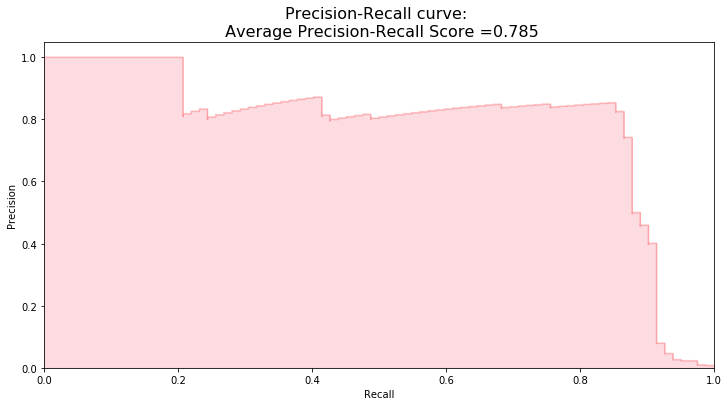

In [30]:
    fig = plt.figure(figsize=(12, 6))
    precision, recall, _ = precision_recall_curve(Y_test,outputs.detach().numpy())
    plt.step(recall, precision, color='r', alpha=0.2,where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='#f25269')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: \n Average Precision-Recall Score ={0:0.3f}'.format(average_precision),fontsize=16)
    plt.savefig('NN_PR.png',dpi=300)